<a href="https://colab.research.google.com/github/rp775/data-science-ipython-notebooks/blob/master/PyTorch_Tutorial_OReilly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to PyTorch - Neural Nets and Beyond

## Robert Alvarez - Head of Data Science at Podium Education


<!--![](data/img/odsc.png)-->

<!---![](data/img/pydata-miami-logo.png)--->

<!---![](data/img/GAIC.jpg)--->

<!--![](data/img/Robert_Alvarez.jpg)-->

![](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/Oreilly.jpg?raw=1)

![](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/pytorch_logo.png?raw=1)

---
# Using PyTorch on Google Server

Google has made a version of Jupyter Notebook available online for **free** that allow us to use GPUs for faster training time! I do not recommend you use the local installation unless you don't have access to the internet.

Go to https://colab.research.google.com and sign in with your Google account. If you do not have a Google account you can create one. From there you can create a new notebook.

# PyTorch on Google

Google Colab has already pre-installed PyTorch (and many other libraries) so no need to re-install on our virtual machines.


In [0]:
# usual suspects
import os
import time
import shutil
import requests
import zipfile
from PIL import Image
from io import BytesIO

import numpy as np
import pandas as pd
from cycler import cycler

# the good stuff
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets, models, transforms
from torchsummary import summary

# standard sklearn import
from sklearn.metrics import accuracy_score

# minor changes to plotting functions
import matplotlib.pyplot as plt
cmap=plt.cm.tab10
c = cycler('color', cmap(np.linspace(0,1,10)))
plt.rcParams["axes.prop_cycle"] = c


# see if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

%matplotlib inline


In [0]:
# Download all necessary files for the live tutorial
# Post Conference pull from GitHub Repo github.com/robert-alvarez

data_url = 'https://www.dropbox.com/s/t1a72uuyrpbjl88/pytorch_data.zip?dl=1'

if not os.path.exists('data'):
    # Download the data zip file.
    response = requests.get(data_url, stream=True)
    zip_path = 'pytorch_data.zip'
    with open(zip_path, 'wb') as f:
        shutil.copyfileobj(response.raw, f)
    # Unzip the file.
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall()
    # Clean up.
    os.remove(zip_path)

# PyTorch

What is PyTorch?

* It is a replacement for NumPy to use GPUs
* A deep learning platform built for flexibility and speed


## Tensor Overview
What are tensors?

Tensors are similar to NumPy's `ndarrays`

We normally think of tensors as a generalization of matrices. In fact, matrices are 2-D tensors!

![](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/grumpy_cat_tensor.jpg?raw=1)

Here is a great visualization of tensors from 1-D to 5-D

![](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/tensor_viz.jpeg?raw=1)

As mentioned before, since tensors are generalizations of matrices, we should be able to create them in similar ways. We can also expect *most* operations to stay the same. In particular, addition of tensors is the same as for matrices. Multiplication is a bit different, but we won't have to concern ourselves with that in this lecture.

### Tensor Types

Torch defines eight CPU tensor types and eight GPU tensor types:

| Data type                | dtype                             | CPU Tensor           | GPU Tensor                |
|--------------------------|-----------------------------------|----------------------|---------------------------|
| 32-bit floating point    | `torch.float32` or `torch.float`  | `torch.FloatTensor`  | `torch.cuda.FloatTensor`  |
| 64-bit floating point    | `torch.float64` or `torch.double` | `torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point    | `torch.float16` or `torch.half`   | `torch.HalfTensor`   | `torch.cuda.HalfTensor`   |
| 8-bit integer (unsigned) | `torch.uint8`                     | `torch.ByteTensor`   | `torch.cuda.ByteTensor`   |
| 8-bit integer (signed)   | `torch.int8`                      | `torch.CharTensor`   | `torch.cuda.CharTensor`   |
| 16-bit integer (signed)  | `torch.int16` or `torch.short`    | `torch.ShortTensor`  | `torch.cuda.ShortTensor`  |
| 32-bit integer (signed)  | `torch.int32` or `torch.int`      | `torch.IntTensor`    | `torch.cuda.IntTensor`    |
| 64-bit integer (signed)  | `torch.int64` or `torch.long`     | `torch.LongTensor`   | `torch.cuda.LongTensor`   |

**Note**: Tensor types need to match when doing calculations with them.

### Numpy ndarrays vs PyTorch Tensors

Let's look at the differences between these two common methods of handling arrays. 

In [0]:
# In numpy, we create tensors (arrays) in the following way
x1 = np.random.rand(5,3)
print(f"x1 =\n {x1}\n")

# Similar to numpy we can create random tensors
t1 = torch.rand(5,3, dtype=torch.float64)
print(f"t1 =\n {t1}")

x1 =
 [[0.57464539 0.24382938 0.11683845]
 [0.67590789 0.39727985 0.09511714]
 [0.71104934 0.65652506 0.28736572]
 [0.75317778 0.43051558 0.3393583 ]
 [0.58310179 0.77346611 0.06494366]]

t1 =
 tensor([[0.0233, 0.3576, 0.3675],
        [0.5186, 0.6670, 0.1047],
        [0.3810, 0.9614, 0.3015],
        [0.2521, 0.9880, 0.2803],
        [0.0888, 0.2719, 0.9555]], dtype=torch.float64)


In [0]:
# check the type
print(f"t1 is a {type(t1)}")
print(f"x1 is a {type(x1)}")

t1 is a <class 'torch.Tensor'>
x1 is a <class 'numpy.ndarray'>


In [0]:
print(f"t1 is dtype {t1.dtype}")
print(f"x1 is dtype {x1.dtype}")

t1 is dtype torch.float64
x1 is dtype float64


In [0]:
# create a 3-D tensor in torch and numpy
t2 = torch.rand(2, 3, 5)
print(f"t2 =\n {t2}\n")

x2 = np.random.rand(2, 3, 5)
print(f"x2 =\n {x2}")

t2 =
 tensor([[[0.6873, 0.7227, 0.3262, 0.0316, 0.5251],
         [0.4285, 0.5557, 0.2796, 0.7278, 0.5673],
         [0.4687, 0.2748, 0.7431, 0.7888, 0.2910]],

        [[0.8096, 0.0765, 0.5793, 0.7794, 0.5226],
         [0.5067, 0.8247, 0.8715, 0.5214, 0.8862],
         [0.4086, 0.7291, 0.6809, 0.7593, 0.1391]]])

x2 =
 [[[0.69535422 0.53963885 0.33932792 0.50305261 0.91385196]
  [0.02817656 0.2364552  0.48197649 0.11275989 0.20916183]
  [0.10915836 0.10334662 0.04460962 0.36809838 0.24621986]]

 [[0.31906465 0.30582996 0.13418513 0.90335276 0.63457465]
  [0.90396131 0.06527904 0.72682744 0.29791934 0.86090372]
  [0.28208306 0.84945761 0.95608241 0.50498173 0.41008034]]]


In [0]:
long_tensor = torch.zeros(5,3, dtype=torch.long)
long_tensor

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [0]:
float_tensor = torch.zeros(5,3, dtype=torch.float64)
float_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [0]:
long_tensor + float_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [0]:
float_tensor + long_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [0]:
# we can also create explicit tensors
x = torch.tensor([2., 3])
x

tensor([2., 3.])

In [0]:
# this method creates a new tensor "y" that has the same properties (e.g. dtype) as the original tensor "x"
y = x.new_ones(5,3)
print(y)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [0]:
# there's a size method as well
y.size()

torch.Size([5, 3])

In [0]:
# We can add tensors as well in the usual way you expect
x = torch.rand(5,3)
x + y

tensor([[1.0259, 1.7911, 1.8241],
        [1.6998, 1.3325, 1.4025],
        [1.0454, 1.4100, 1.6801],
        [1.3793, 1.1543, 1.6497],
        [1.2266, 1.1448, 1.3472]])

In [0]:
# We can also add like this
torch.add(x, y)

tensor([[1.0259, 1.7911, 1.8241],
        [1.6998, 1.3325, 1.4025],
        [1.0454, 1.4100, 1.6801],
        [1.3793, 1.1543, 1.6497],
        [1.2266, 1.1448, 1.3472]])

In [0]:
# OR like this!
# The `*_` method works just like `inplace=True` in pandas
y.add_(x) 

tensor([[1.0259, 1.7911, 1.8241],
        [1.6998, 1.3325, 1.4025],
        [1.0454, 1.4100, 1.6801],
        [1.3793, 1.1543, 1.6497],
        [1.2266, 1.1448, 1.3472]])

In [0]:
# see!
y

tensor([[1.0259, 1.7911, 1.8241],
        [1.6998, 1.3325, 1.4025],
        [1.0454, 1.4100, 1.6801],
        [1.3793, 1.1543, 1.6497],
        [1.2266, 1.1448, 1.3472]])

In [0]:
# Indexing works just like in numpy
y[:, 1]

tensor([1.7911, 1.3325, 1.4100, 1.1543, 1.1448])

In [0]:
# We can reshape tensors as well though it's called "view" in pytorch
# support for 'reshape' has been added
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1, 8)
w = x.reshape(2, -1)
print(x.size(), y.size(), z.size(), w.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8]) torch.Size([2, 8])


More on torch operations can be found here: https://pytorch.org/docs/stable/torch.html

In [0]:
# Converting to/from PyTorch & NumPy is easy
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [0]:
# convert to numpy
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [0]:
# what do we expect this result to be?
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [0]:
# Convert from numpy to torch
c = np.random.randn(4,5)
print(c)
d = torch.from_numpy(c)
print(d)

[[ 0.13295256  0.23901345  1.9362392  -0.9985761  -0.10509811]
 [-0.60954699  2.16330219 -1.0670677  -0.74724259  0.57394942]
 [ 0.34348675 -0.35155486  0.40098992 -0.75193142  0.80156104]
 [-1.14402273 -0.1717381   1.40108464 -0.04661223 -1.97968873]]
tensor([[ 0.1330,  0.2390,  1.9362, -0.9986, -0.1051],
        [-0.6095,  2.1633, -1.0671, -0.7472,  0.5739],
        [ 0.3435, -0.3516,  0.4010, -0.7519,  0.8016],
        [-1.1440, -0.1717,  1.4011, -0.0466, -1.9797]], dtype=torch.float64)


## Autograd - AKA why PyTorch is awesome

Central to all Neural Networks in PyTorch is the `autograd` package. 

The `autograd` package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, 
which means that your backprop is defined by how your code is run, and that every single iteration can be different.

Let's look at a basic example of this before turning to Neural Networks.

In [0]:
# Create a tensor and set requires_grad=True to track computation with it
x = torch.ones(2,2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [0]:
# Do some operation on said tensor
y = 3*x + 7
print(y)

tensor([[10., 10.],
        [10., 10.]], grad_fn=<AddBackward0>)


In [0]:
# Because y was created as a result of an operation, it now has a grad_fn method
y.grad_fn

In [0]:
# We can do more stuff to y (and thus x) and calculate its derivatives
z = 2*y**2
w = z.mean()

print(z, w)

tensor([[200., 200.],
        [200., 200.]], grad_fn=<MulBackward0>) tensor(200., grad_fn=<MeanBackward0>)


Let's do that derivative by hand and see that we get the same result.

$\frac{\partial w}{\partial x} = \frac{\partial w}{\partial z} \frac{\partial z}{\partial y} \frac{\partial y}{\partial x}$

Which gives us 

$w(x) = \frac{1}{4} z(x)^2 = \frac{1}{2} (3x+7)^2$

$w'(x) = (3x+7)*3|_{x=1} = 30$

In [0]:
# Backpropagation in one line!
w.backward()

In [0]:
# et voila!
x.grad

tensor([[30., 30.],
        [30., 30.]])

## Linear Regression Example

In [0]:
n=1000

In [0]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.8091,  1.0000],
        [-0.4870,  1.0000],
        [-0.7093,  1.0000],
        [ 0.9993,  1.0000],
        [-0.5806,  1.0000]])

In [0]:
a = torch.tensor([3.,2]); a

tensor([3., 2.])

In [0]:
y = x@a + torch.randn(n)/3

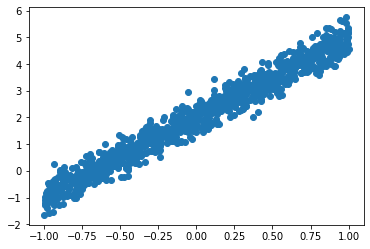

In [0]:
plt.scatter(x[:,0], y);

In [0]:
def mse(y, y_pred): 
    return ((y - y_pred)**2).mean()

In [0]:
a_guess = torch.tensor([-1.,1])

In [0]:
y_hat = x@a_guess # @ is matrix multiplication
mse(y_hat, y)

tensor(6.4606)

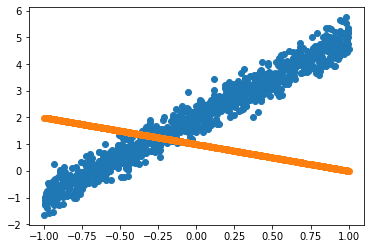

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

In [0]:
a_guess = nn.Parameter(a_guess)
a_guess

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    '''
    function to update tensor using SGD
    '''
    y_hat = x@a_guess
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a_guess.sub_(lr * a_guess.grad)
        a_guess.grad.zero_()

In [0]:
lr = 1e-1
for t in range(100): 
    update()

tensor(6.4606, grad_fn=<MeanBackward0>)
tensor(1.4383, grad_fn=<MeanBackward0>)
tensor(0.4507, grad_fn=<MeanBackward0>)
tensor(0.2029, grad_fn=<MeanBackward0>)
tensor(0.1399, grad_fn=<MeanBackward0>)
tensor(0.1238, grad_fn=<MeanBackward0>)
tensor(0.1197, grad_fn=<MeanBackward0>)
tensor(0.1187, grad_fn=<MeanBackward0>)
tensor(0.1184, grad_fn=<MeanBackward0>)
tensor(0.1184, grad_fn=<MeanBackward0>)


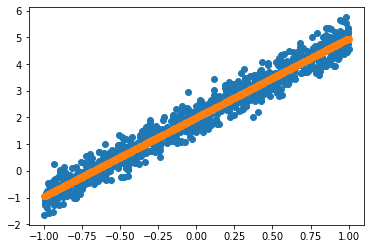

In [0]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a_guess.detach()); # detach() removes gradient from `a` so it can be plotted. otherwise matplotlib gives error

### Normal Equations
Although we solved for the line of best fit using stochastic gradient descent,
we could have also used the [Normal Equations](https://en.wikipedia.org/wiki/Linear_least_squares#Derivation_of_the_normal_equations) given by

$$ \theta = (X^T X)^{-1} X^T \vec y$$

where $\theta$ is the vector we called `a` in the linear regression code above

Parameter containing:
tensor([2.9633, 1.9942], requires_grad=True)
tensor([2.9674, 1.9940])


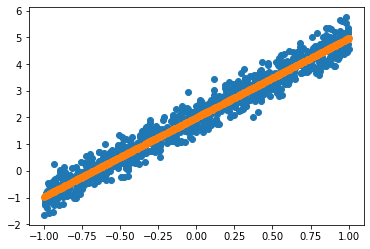

In [0]:
# Exercise:
# Use pytorch to solve for theta using the normal equations
# plot your result when you are finished

# HINT:
# matrix inverse in pytorch: x.inverse()
# matrix transpose in pytorch: torch.t(x)

# Code goes here
print(a_guess)
theta = (torch.t(x) @ x).inverse() @ torch.t(x) @ y
print(theta)

plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@theta.detach());

---
# Neural Nets

Neural networks (NNs) are special forms of nonlinear regressions where the decision system for which the NN is built mimics the way 
the brain is supposed to work (whether it works like a NN is up for grabs, of course).

Like many of the algorithms we have seen in classical machine learning, it is a supervised learning technique that can perform complex tasks.

## Perceptrons

The basic building block of a neural network is a perceptron. A perceptron is like a neuron in a human brain. It takes inputs 
(e.g. sensory in a real brain) and then produces an output signal. An entire network of perceptrons is called a neural net.

![linear regression](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/NN_perceptron.png?raw=1)

In general, a perceptron could have more or fewer inputs.

Instead of assigning equal weight to each of the inputs, we can assign real numbers $w_1, w_2, \ldots$ expressing the importance of the respective inputs to the output. The nueron's output, 0 or 1, is determined whether the weighted sum $\sum_j w_j x_j$ is less than or greater than some *threshold value*.

Perceptrons may emit continuous signals or binary $(0,1)$ signals. In the case of a credit card application, the final perceptron is a binary one (approved or denied). Such perceptrons are implemented by means of squashing functions. For example, a really simple squashing function is one that issues a 1 if the function value is positive and a $-1$ if it is negative.

To put this in more mathematical terms, let $z = \sum_{j=0}^n w_j x_j$ . 
Then the *activation function* $\phi(z)$ is defined as 

$$
\phi(z) =
\begin{cases}
-1 & \text{if } z < \theta\\
 1 & \text{if } z \geq \theta
\end{cases}
$$

![](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/activation-function.png?raw=1)

The whole point of the perceptron is to mimic how a single nueron in the brain works: it either *fires* or it doesn't. Thus, the 
perceptron rule is fairly simple and can be summarized by the following steps.
​
* Initialize the weights to zero or small random numbers
* For each training sample $\textbf{x}_n$ perform the following steps:
    * Compute the output value $y$
    * Calculate error in $y$ vs $\hat y$
    * Update the weights
  
Here, the output value is the class label predicted by the activation function that we defined earlier, and the
simultaneous update of weight $w_j$ in the weight vector $\textbf{w}$ can be more formally written as
​
$$\bar w_j = w_j + \Delta w_j$$


## Fitting a model

Let's go back to our linear perceptron. It has the following parameters:

* $x_i$: inputs
* $y$ : output
* $w_i$: learned weights

What we would like to do is adjust the $w_i$'s until our model has the best fit.

First, initialize the $w_i$'s in some meaningful way (usually they're drawn from a randon uniform distribution).

Then, we put it into the usual **algorithm workflow:**

* calculate prediction $\hat y$
* calculate Loss function $L(y, \hat y)$
* update weights using backpropagation

### Loss function and backpropagation

To figure out how well our prediction was during each epoch, we'll use a basic loss function, mean squared error (MSE):

$L(y,\hat{y}) = ||~ y-\hat{y} ~||^2$,

ultimately trying to find $L_{\rm min}$, defined by the point in parameter space where $\nabla_{w_i} L = 0$.

Per-iteration update: 

$ w_i \to w_i - \eta \nabla_{w_i} L $,

where $\eta$ is known as the learning rate; too small and takes very long to converge, too big and you oscillate about the minimum.


## A basic example
​
We'll build a Rube Goldberg adding machine that will illustrate how neural nets work.

In [0]:
model = nn.Sequential(
    nn.Linear(2, 1, bias=False))

optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=False)
)


In [0]:
total_loss = []
num_samples = 10_000

for num in range(1, num_samples+1):
    # Progress bar indicator
    if num % (num_samples//5) == 0:
        print('{0}: %: {1:.3f}'.format(num,num/num_samples * 100))
        
    # data prep
    x = 4*torch.rand(2) #generate two random numbers uniformly on (0,4)
    data, target = Variable(x), Variable(x[0] + x[1])
    
    # Feed forward through NN
    output = model(data)
    loss = criterion(output, target)
    total_loss.append(loss)
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


2000: %: 20.000
4000: %: 40.000
6000: %: 60.000
8000: %: 80.000
10000: %: 100.000


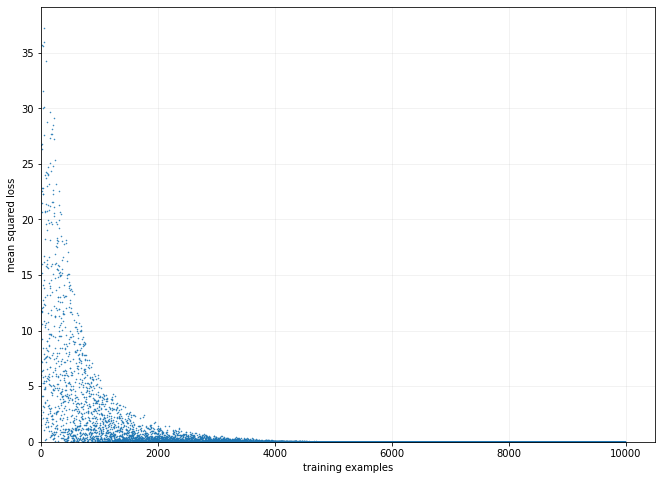

In [0]:
fig,ax=plt.subplots(figsize=(11,8))
ax.plot(total_loss,marker='.',ls='',markersize=1.)
ax.set_ylim(0,);ax.set_xlim(0,);ax.grid(alpha=0.2);
ax.set_xlabel('training examples');ax.set_ylabel('mean squared loss');

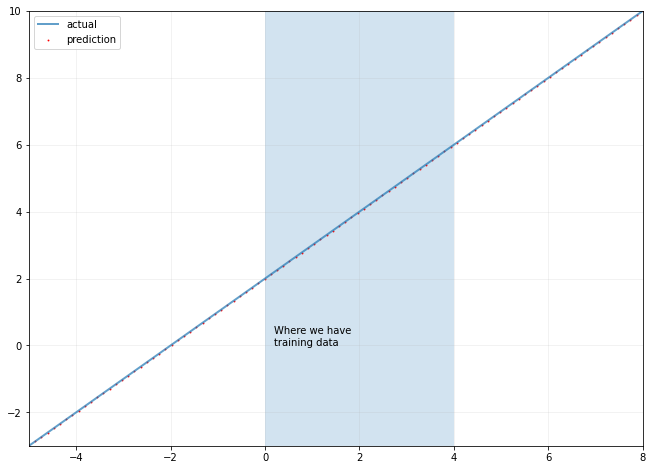

In [0]:
x,y=np.linspace(-5,8,100),[]

for xx in x:
    yy=model(torch.tensor([xx,2])).data.cpu().numpy()[0]
    y.append(yy)
y=np.array(y)

fig,ax=plt.subplots(figsize=(11,8))
ax.plot([-5,8],[-3,10],lw=2.0,label='actual',alpha=0.7)
ax.fill_betweenx([-3,10],0,4,alpha=0.2)
ax.scatter(x,y,marker='.',s=3.,label='prediction',color='r')
ax.text(0.2,0,'Where we have \ntraining data')
ax.legend()
ax.set_ylim(-3,10);ax.set_xlim(-5,8);
ax.grid(alpha=0.2);


## Feedforward Neural Network

![General Feed Forward Network](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/neural_net_123.png?raw=1)

For our case of learning linear relationships, the modification to the linear regression architecture is depicted below:


![non-linear activation](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/linear_regression_activation.png?raw=1)

where

$$\varphi(z) = \frac{1}{1+e^{-z}}$$

is the so-called sigmoid function; this is typically the activation function that is first introduced, I think because of historical reasons. In modern practice, it finds most of its use in transforming single outputs from a NN into a probability. It's worth noting that if your NN will output multiple probabilities, for example, if your NN will categorize between black cats, red cats, white cats, etc., a multi-dimensional generalization of the sigmoid, called the softmax function, is typically used. 

The motivation behind adding an activation function is the hope that the NN model may capture non-linear relationships that exist in the data. Below are some commonly used activation functions. 

![activation functions](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/activation_function_list.png?raw=1)

In practice, a lot of architectures use the rectified linear unit (ReLU), along with it's close cousin, the so-called leaky-ReLU. In introducing this idea though, we'll focus on the sigmoid which maps real numbers from $(-\infty,\infty) \to [0,1]$.

Of course our data is linear in the case of a straight line (!) but let's see what happens if we try to force a non-linear activation layer to capture a linear relationship..

## Non-linear model for a linear relationship

### Deep Feedforward Network with sigmoid activation

In [0]:
model = nn.Sequential(
            nn.Linear(2, 20),
            nn.Sigmoid(),
            nn.Linear(20, 20),
            nn.Sigmoid(),
            nn.Linear(20, 20),
            nn.Sigmoid(),
            nn.Linear(20, 1))

optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=20, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=20, out_features=1, bias=True)
)


In [0]:
total_loss = []
num_samples = 10_000

for num in range(1, num_samples+1):
    # Progress bar indicator
    if num % (num_samples//5) == 0:
        print('{0}: %: {1:.3f}'.format(num,num/num_samples * 100))
        
    # data prep
    x = 4*torch.rand(2) #generate two random numbers uniformly on (0,4)
    data, target = Variable(x), Variable(x[0] + x[1])
    
    # Feed forward through NN
    output = model(data)
    loss = criterion(output, target)
    total_loss.append(loss)
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


2000: %: 20.000
4000: %: 40.000
6000: %: 60.000
8000: %: 80.000
10000: %: 100.000


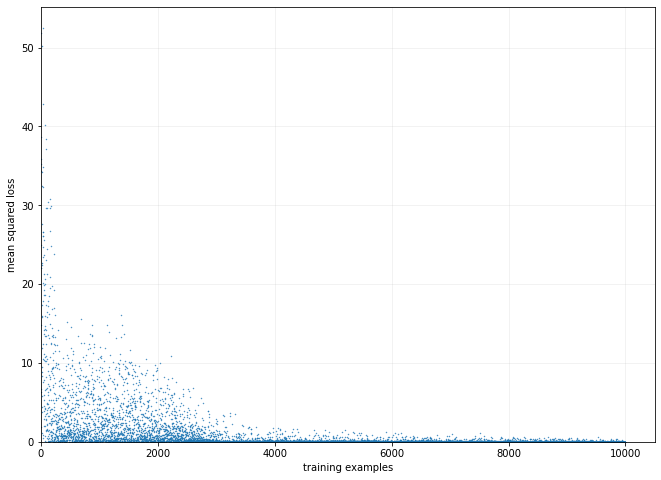

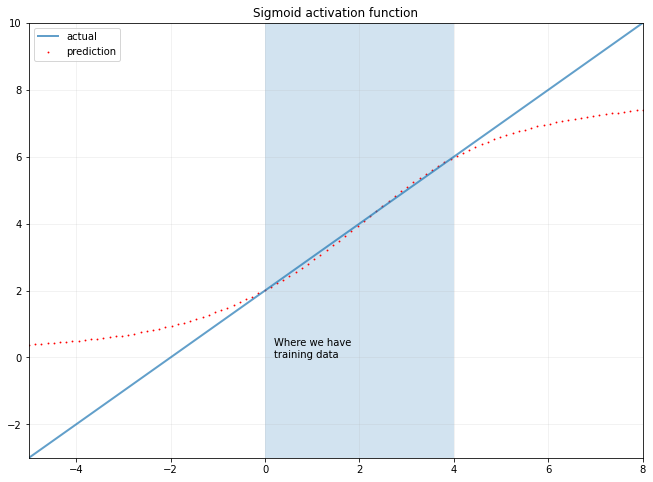

In [0]:
fig,ax=plt.subplots(figsize=(11,8))
ax.plot(total_loss,marker='.',ls='',markersize=.8)
ax.set_ylim(0,);ax.set_xlim(0,);ax.grid(alpha=0.2);
ax.set_xlabel('training examples');ax.set_ylabel('mean squared loss');

x,y=np.linspace(-5,8,100),[]

for xx in x:
    yy=model(torch.tensor([xx,2])).data.cpu().numpy()[0]
    y.append(yy)
y=np.array(y)

fig,ax=plt.subplots(figsize=(11,8))
ax.plot([-5,8],[-3,10],lw=2.0,label='actual',alpha=0.7)
ax.fill_betweenx([-3,10],0,4,alpha=0.2)
ax.scatter(x,y,marker='.',s=3.,label='prediction',color='r')
ax.text(0.2,0,'Where we have \ntraining data')
ax.legend()
ax.set_ylim(-3,10);ax.set_xlim(-5,8);
ax.grid(alpha=0.2);
ax.set_title('Sigmoid activation function');

## ReLU activation function

In [0]:
model = nn.Sequential(
            nn.Linear(2, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 1))

optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
)


In [0]:
total_loss = []
num_samples = 10_000

for num in range(1, num_samples+1):
    # Progress bar indicator
    if num % (num_samples//5) == 0:
        print('{0}: %: {1:.3f}'.format(num,num/num_samples * 100))
        
    # data prep
    x = 4*torch.rand(2) #generate two random numbers uniformly on (0,4)
    data, target = Variable(x), Variable(x[0] + x[1])
    
    # Feed forward through NN
    output = model(data)
    loss = criterion(output, target)
    total_loss.append(loss)
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


2000: %: 20.000
4000: %: 40.000
6000: %: 60.000
8000: %: 80.000
10000: %: 100.000


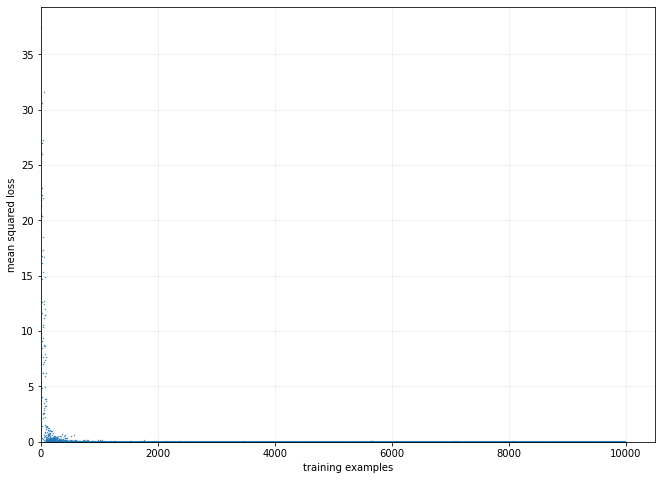

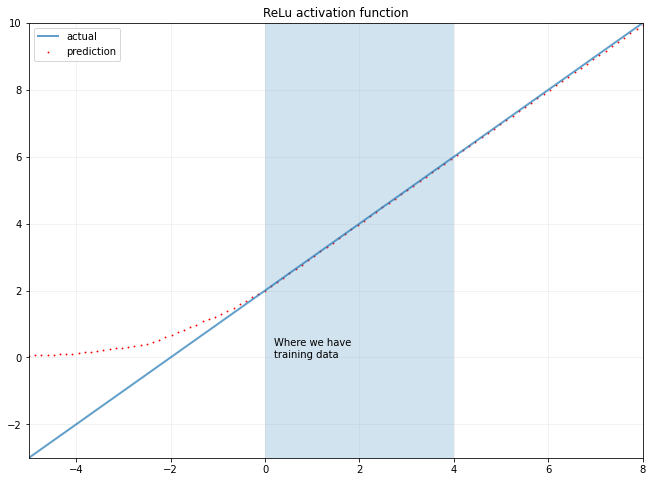

In [0]:
fig,ax=plt.subplots(figsize=(11,8))
ax.plot(total_loss,marker='.',ls='',markersize=.8)
ax.set_ylim(0,);ax.set_xlim(0,);ax.grid(alpha=0.2);
ax.set_xlabel('training examples');ax.set_ylabel('mean squared loss');

x,y=np.linspace(-5,8,100),[]

for xx in x:
    yy=model(torch.tensor([xx,2])).data.cpu().numpy()[0]
    y.append(yy)
y=np.array(y)

fig,ax=plt.subplots(figsize=(11,8))
ax.plot([-5,8],[-3,10],lw=2.0,label='actual',alpha=0.7)
ax.fill_betweenx([-3,10],0,4,alpha=0.2)
ax.scatter(x,y,marker='.',s=3.,label='prediction',color='r')
ax.text(0.2,0,'Where we have \ntraining data')
ax.legend()
ax.set_ylim(-3,10);ax.set_xlim(-5,8);
ax.grid(alpha=0.2);
ax.set_title('ReLu activation function');

## Teaching a machine to draw circles

Here the NN learns attempts to learn the 2d rotation matrix, parameterized by the generator of rotations in two dimensions:

$R={\begin{bmatrix}\cos \theta &-\sin \theta \\\sin \theta &\cos \theta \\\end{bmatrix}}$

In [0]:
# First some helper functions for plotting and model training
def train_models(models, optimizers, num_samples=1000, circle_interval=1.0, save_models=False, cuda=torch.cuda.is_available(), recurrent=False):
    total_loss = []
    for num in range(1, num_samples+1):
        # progress indicator 
        if num % (num_samples//20) ==0:
            print('{0}: %: {1:.3f}'.format(num, num/num_samples * 100))
            
        # data calc 
        # take a random point on the circle of radius 1
        x, theta = torch.ones(2), circle_interval*2*np.pi*torch.rand(1)
        R = torch.zeros(2,2)
        R[0,:] = torch.Tensor([np.cos(theta[0]),-np.sin(theta[0])])
        R[1,:] = torch.Tensor([np.sin(theta[0]), np.cos(theta[0])])
        
        data, target = Variable(theta), Variable(torch.mv(R,x))
        
        # Check if GPU can be used
        if cuda:
            data, target = data.cuda(), target.cuda()
            
        # learning phases 
        for idx, model in enumerate(models):
            loss_iter = []
            # forward 
            if recurrent:
                output = model(data,None)
            else:
                output = model(data)
            loss = criterion(output, target)
            loss_iter.append(loss.data.item())
            # backward 
            optimizers[idx].zero_grad()
            loss.backward()
            optimizers[idx].step()
        total_loss.append(np.mean(loss_iter))
        
    # save model state 
    if save_models:
        for l,model in enumerate(models):
            torch.save(model.state_dict(), 'rotations_{}.pth'.format(l))
    return total_loss,theta
        
def plot_circles(models, offset=0, CI=False):
    fig, axes = plt.subplots(figsize=(5*3,3.9),ncols=3)
    x = torch.ones(2)
    for k,ax in enumerate(axes):
        ax.scatter(x[0],x[1], facecolors='none', edgecolors='r')
        ax.scatter(x[0],x[1], facecolors='none', edgecolors='b')
        x_real, y_real = [],[]
        x_mean, y_mean = [],[]
        x_std, y_std = [],[]
        for theta in np.linspace((k+offset) *2*np.pi,(k+1+offset) *2*np.pi,300):
            x_model,y_model = [],[]
            # sythetic (real) data 
            data = Variable(torch.Tensor([theta]))#.cuda()
            R = torch.zeros(2,2)
            R[0,:] = torch.Tensor([np.cos(theta),-np.sin(theta)])
            R[1,:] = torch.Tensor([np.sin(theta), np.cos(theta)])
            real = torch.mv(R,x)
            x_real.append(real[0].numpy())
            y_real.append(real[1].numpy())
            # predict w/ all models 
            for model in models:
                if torch.cuda.is_available():
                    model.cpu()
                    outputs=model(data).data
                    xx_model, yy_model = outputs[0],outputs[1]
                    x_model.append(xx_model.numpy())
                    y_model.append(yy_model.numpy())
                else:
                    outputs=model(data).data
                    xx_model, yy_model = outputs[0],outputs[1]
                    x_model.append(xx_model.numpy())
                    y_model.append(yy_model.numpy())
            # summarize all model predictions 
            x_mean.append(np.mean(x_model))
            y_mean.append(np.mean(y_model))
            x_std.append(np.std(x_model))
            y_std.append(np.std(y_model))
        # plotting data 
        ax.scatter(x_real,y_real, facecolors='none', edgecolors='r',label='real data',s=2.)
        ax.scatter(x_mean,y_mean, facecolors='none', edgecolors='k',label='model data', alpha=0.9,s=2.)
        if CI:
            ax.fill_betweenx(y_mean,x_mean-3*np.array(x_std),x_mean+3*np.array(x_std), alpha=0.1,color='b')
            ax.fill_between(x_mean,y_mean-3*np.array(y_std),y_mean+3*np.array(y_std), alpha=0.1,color='b')
        ax.legend()
        ax.set_ylim(-2,2);ax.set_xlim(-2,2);ax.grid(alpha=0.3)
        ax.set_title(r'${}\pi \leq \theta \leq {}\pi$'.format(2*(k+offset),2*(k+1+offset)),y=1.01);
    
    return x_mean, y_mean, np.array(x_std), np.array(y_std)
        
def weight_init(m): # so-called xavier normalization https://arxiv.org/abs/1211.5063
    if isinstance(m, nn.Linear):
        size = m.weight.size()
        fan_out = size[0]
        fan_in = size[1]
        variance = np.sqrt(2.0/(fan_in + fan_out))
        m.weight.data.normal_(0.0, variance)

Rotations(
  (layer1): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=2, bias=True)
  )
)
7500: %: 5.000
15000: %: 10.000
22500: %: 15.000
30000: %: 20.000
37500: %: 25.000
45000: %: 30.000
52500: %: 35.000
60000: %: 40.000
67500: %: 45.000
75000: %: 50.000
82500: %: 55.000
90000: %: 60.000
97500: %: 65.000
105000: %: 70.000
112500: %: 75.000
120000: %: 80.000
127500: %: 85.000
135000: %: 90.000
142500: %: 95.000
150000: %: 100.000


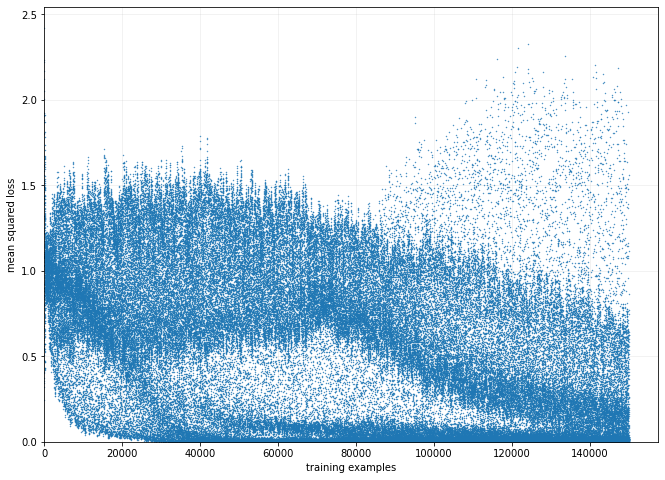

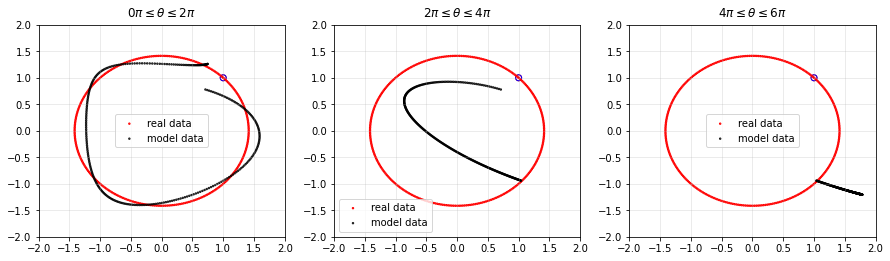

In [0]:
num_nodes=10

# Usually we define neural nets as a class in pytorch
class Rotations(nn.Module):
    def __init__(self):
        super(Rotations, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(1,num_nodes),
            nn.Sigmoid(),
            nn.Linear(num_nodes,2))      
    def forward(self, x):
        out=self.layer1(x)
        return out

model = Rotations().to(device)
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()
print(model)

total_loss, theta = train_models([model], [optimizer], num_samples=150000, circle_interval=2.0)

fig,ax = plt.subplots(figsize=(11,8))
ax.plot(total_loss,marker='.',ls='',markersize=.8)
ax.set_ylim(0,);ax.set_xlim(0,);ax.grid(alpha=0.2);
ax.set_xlabel('training examples');ax.set_ylabel('mean squared loss');

output=plot_circles([model],offset=0,CI=False)

### Will a deeper network perform better?

Rotations(
  (layer1): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=10, out_features=2, bias=True)
  )
)
5000: %: 5.000
10000: %: 10.000
15000: %: 15.000
20000: %: 20.000
25000: %: 25.000
30000: %: 30.000
35000: %: 35.000
40000: %: 40.000
45000: %: 45.000
50000: %: 50.000
55000: %: 55.000
60000: %: 60.000
65000: %: 65.000
70000: %: 70.000
75000: %: 75.000
80000: %: 80.000
85000: %: 85.000
90000: %: 90.000
95000: %: 95.000
100000: %: 100.000


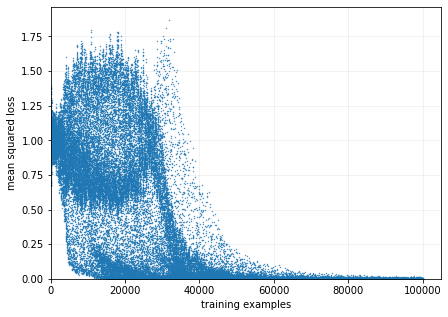

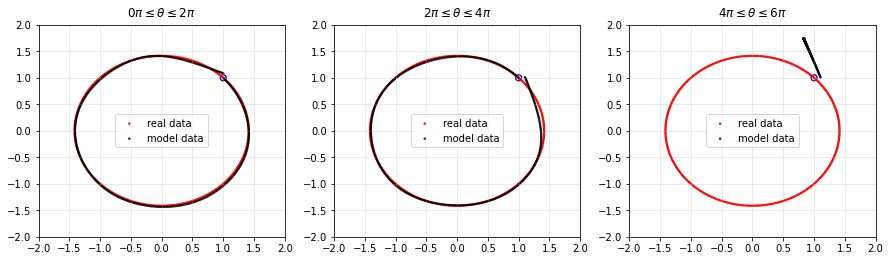

In [0]:
# Add more layers to the model and see if performance on the test set increases
num_nodes=10
class Rotations(nn.Module):
    def __init__(self):
        super(Rotations, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(1,num_nodes),
            nn.Sigmoid(),
            nn.Linear(num_nodes,num_nodes),
            nn.Sigmoid(),
            nn.Linear(num_nodes,num_nodes),
            nn.Sigmoid(),
            nn.Linear(num_nodes,2))      
    def forward(self, x):
        out=self.layer1(x)
        return out

model=Rotations().to(device)
optimizer=torch.optim.Adam(model.parameters())
criterion=nn.MSELoss()
print(model)

total_loss,theta=train_models([model],[optimizer],num_samples=100000,circle_interval=2.0)

fig,ax=plt.subplots(figsize=(7,5))
ax.plot(total_loss,marker='.',ls='',markersize=.8)
ax.set_ylim(0,);ax.set_xlim(0,);ax.grid(alpha=0.2);
ax.set_xlabel('training examples');ax.set_ylabel('mean squared loss');

output=plot_circles([model],offset=0,CI=False)

## Parallel approach

One simple approach to apply the method described by Yarin Gal, is to take multiple of the same models and train them independently. This allows each model to take independent paths through parameter space, usually finding their way near some optimal minima. In practice, this allows you to hedge the risk of getting stuck in some local minima and missing out on the global one, if it exists. 

A visual way of understanding the situation of training a machine learning model, in general, is by considering a 3D surface plot where the x and y dimensions are two parameters you may modify, with the loss on the z axis, or height, which your aim is to minimize. 

![landscape of deep learning models](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/graphical-idea-backprop.png?raw=1)

The surface that the data carves out in this space is predicated by the data; the aim of the model design is then to build a model flexible and robust enough to find the global minima, but not overly complex enough to overfit and get stuck at a local minima. Also, if your model is too simple, it can skip right over all the minima altogether, and not learn the nuance of the process described by the data. Having too high/low of a learning rate can also make the training process difficult.

---
# Image Recognition and Transfer Learning

![Convolutional Architecture](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/cnn_architecture.png?raw=1)

# Transfer Learning

Transfer learning is one of the most useful discoveries to come out of the computer vision community. Stated simply, transfer learning allows one model that was trained on different types of images, e.g. dogs vs cats, to be used for a different set of images, e.g. planes vs trains, while reducing the training time dramatically. When Google released ImageNet, they stated it took them over 14 **days** to train the model on some of the most powerful GPUs available at the time. Now, with transfer learning, we will train an, albeit smaller, model in less than 5 minutes.


The philosophy behind transfer learning is simple. We keep the "base" layers of a model frozen since the weights have already been tuned to identify patterns such as lines, circles, and other shapes, and insert layers at the end that will be tuned for the specific task at hand.

![](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/NN_vision.png?raw=1)

![](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/transfer_learning.png?raw=1)


For our task, let's take a look at the King and Queen of the Miami food scene: 

**The Cuban Sandwich**  

![](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/cubano.jpg?raw=1)

**The Stuffed Arepa**

![](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/arepa.jpg?raw=1)

In [0]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
 
data_transforms = {
    'train':
        transforms.Compose([
            transforms.Resize((224,224)),
            transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor()]),
    'validation':
        transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor()])}
 
image_datasets = {
    'train':
        datasets.ImageFolder('data/cva_data/train', data_transforms['train']),
    'validation':
        datasets.ImageFolder('data/cva_data/validation', data_transforms['validation'])}
 
dataloaders = {
    'train':
        torch.utils.data.DataLoader(
            image_datasets['train'],
            batch_size=32,
            shuffle=True,
            num_workers=4),
    'validation':
        torch.utils.data.DataLoader(
            image_datasets['validation'],
            batch_size=32,
            shuffle=False,
            num_workers=4)}

In [0]:
model = models.resnet50(pretrained=True).to(device)
 
for param in model.parameters():
    param.requires_grad = False
    
# modify the final layer of resnet50 (called 'fc')
# originally model.fc = nn.Linear(2048, 1000) for the 1000 image classes
# we modify it to our specific needs

model.fc = nn.Sequential(
    nn.Linear(2048, 128),
    # inplace=True is a shortcut to not modify the forward method 
    nn.ReLU(inplace=True),
    nn.Linear(128, 2)).to(device)
 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters())

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
# Get estimate of model size: number of parameters, storage, etc.

# input size is based off of the dimensions of a single example in our dataset.
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [0]:
def train_model(model, criterion, optimizer, num_epochs=3):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
 
            running_loss = 0.0
            running_corrects = 0
 
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
 
                outputs = model(inputs)
                loss = criterion(outputs, labels)
 
                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
 
                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
 
            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])
 
            print(f'{phase} loss: {epoch_loss}, acc: {epoch_acc}')
    return model
 
model_trained = train_model(model, criterion, optimizer, num_epochs=3)

Epoch 1/3
----------
train loss: 0.7440455305761624, acc: 0.5259067357512953
validation loss: 0.5955931772577002, acc: 0.5957446808510638
Epoch 2/3
----------
train loss: 0.6591276566599317, acc: 0.5595854922279793
validation loss: 0.5622166496642093, acc: 0.6170212765957447
Epoch 3/3
----------
train loss: 0.4749650244885776, acc: 0.8523316062176166
validation loss: 0.434127594562287, acc: 0.9148936170212766


### Saving Models

In [0]:
torch.save(model_trained.state_dict(),'models/cva_weights_new.pt')

### Loading Models

In [0]:
model = models.resnet50(pretrained=False).to(device)
model.fc = nn.Sequential(
    nn.Linear(2048, 128),
    nn.ReLU(inplace=True),
    nn.Linear(128, 2)).to(device)
model.load_state_dict(torch.load('models/cva_weights.h5'))
model.eval() # stop training model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Make predictions on test images

In [0]:
validation_img_paths = ["data/cva_data/validation/arepas/00000165.jpg",
                        "data/cva_data/validation/cubanos/00000037.jpg",
                        "data/cva_data/validation/cubanos/00000061.jpg",
                        "data/cva_data/validation/arepas/00000003.jpeg"]
img_list = [Image.open(img_path) for img_path in validation_img_paths]


In [0]:
validation_batch = torch.stack([data_transforms['validation'](img).to(device)
                                for img in img_list])
 
pred_logits_tensor = model(validation_batch)
pred_probs = F.softmax(pred_logits_tensor, dim=1).cpu().data.numpy()

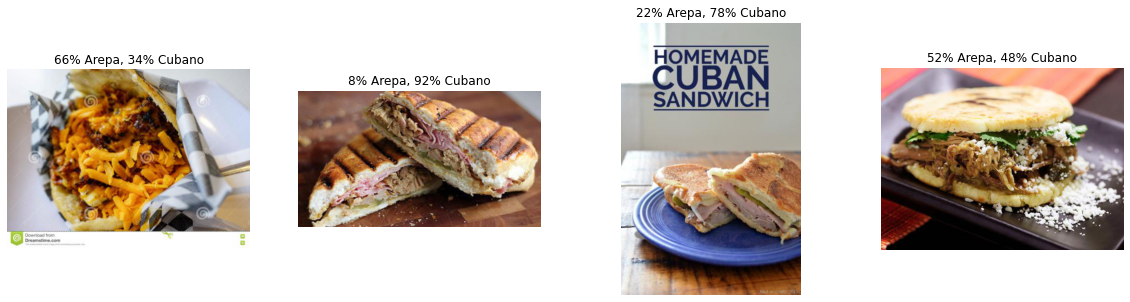

In [0]:
fig, axs = plt.subplots(1, len(img_list), figsize=(20, 5))
for i, img in enumerate(img_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% Arepa, {:.0f}% Cubano".format(100*pred_probs[i,0],
                                                          100*pred_probs[i,1]))
    ax.imshow(img)


# CNN from Scratch

###  `Datasets` and `Dataloaders`

In PyTorch, you'll usually create or import a `Dataset` subclass to represent your data. Once you've done that, you can use it to instantiate a `Dataloader` object which allows you to easily iterate over your training set in `BATCH_SIZE` chunks.

In [0]:
image_size = 28
num_classes = 10
num_channels = 1
batch_size = 64
id_to_label = {
    0 :'T-shirt/top',
    1 :'Trouser',
    2 :'Pullover',
    3 :'Dress',
    4 :'Coat',
    5 :'Sandal',
    6 :'Shirt',
    7 :'Sneaker',
    8 :'Bag',
    9 :'Ankle boot'}


class FashionDataset(Dataset):

    def __init__(self, path, 
                 image_size, num_channels, image_transform=None):
        self.num_channels = num_channels
        self.image_size = image_size
        self.image_transform = image_transform
        data_df = pd.read_csv(path)
        self.X = data_df.values[:, 1:]
        self.X = self.X.reshape(-1, image_size, image_size, num_channels)
        self.X = self.X.astype('float32')
        self.y = data_df.values[:, 0]
        
    def __getitem__(self, index):
        batch_X, batch_y = self.X[index], self.y[index]
        if self.image_transform is not None:
            batch_X = self.image_transform(batch_X)
        return batch_X, batch_y

    def __len__(self):
        return len(self.X)

# This simple transform coverts the image from an numpy array
# to a PyTorch tensor and remaps its values from 0-255 to 0-1. 
# Many other types of transformations are available, and they 
# can easily be composed into a pipeline. For more info see: 
# https://pytorch.org/docs/stable/torchvision/transforms.html
image_transform = transforms.Compose([transforms.ToTensor()])

train_dataset = FashionDataset(
    'fashionmnist/fashion-mnist_train.csv', 
    image_size, 
    num_channels, 
    image_transform)

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True)

val_dataset = FashionDataset(
    'fashionmnist/fashion-mnist_test.csv', 
    image_size, 
    num_channels, 
    image_transform)

val_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size)

### Show some examples from the training set

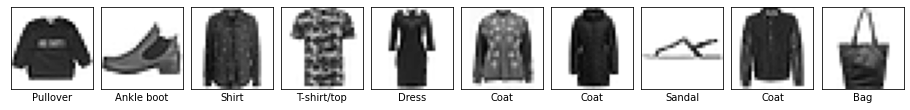

In [0]:
def plot_images(data, labels, image_size):
    fig, axes = plt.subplots(
        1, data.shape[0], figsize=(16, 4), 
        subplot_kw={'xticks':[], 'yticks':[]},
        gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(image_size, image_size), cmap='binary')
        ax.set_xlabel(labels[i])
        
images = train_dataset.X[:10]
class_ids = train_dataset.y[:10]
class_labels = [id_to_label[class_id] for class_id in class_ids]
plot_images(images, class_labels, image_size)

## Modeling

This baseline network uses a single convolution with only 4 filters. Because of the simplicity of our dataset, it still manages to achieve nearly 90% accuracy after only 5 epochs.

Experiment and see if you can increase the accuracy on the validation set to above 95%.

Things you might try:

* Increasing the number of filters per convolution.
* Adding more convolutions.
* Adding a `BatchNorm2d` layer after `Conv2d`.
* Increasing the number of epochs.
* Changing the kernel size.
* Using different types of pooling or using stride > 1 in convolutional layers instead of pooling.

You might also find the [PyTorch API reference](https://pytorch.org/docs/stable/nn.html) useful.

### Determining Output Size after Convolution and MaxPool

When dealing with any neural net model, we have to ensure that each one of our layers is receiving the correct input size from its previous layers. This is easier said than done as, in Computer Vision, we have to convert from 2D layers such as convolutions, batch normalizations, and max pooling layers to communicate properly with a linear layer that follows. To do this, we have to ensure that our calculations for the **input** to each layer is correct when we instantiate our model.

Linear layers are simple, the output size is stated when we instantiate. The difficulty lies in Conv2D layers since PyTorch calculates the output size using a formula and we need to determine what that size if by hand if we need it to pass it as input for other layers.

To determine the output size after 2D layers we usually have to do it separately for our height and width, but since we are dealing with square images they will give us the same result. Furthermore, we'll remove any values that are set to zero in our model to reduce the complexity of the equation. For more information on output size for different functions, refer to the PyTorch API.

#### Conv2D

$$H_{out} = \frac{H_{in} - kernel + 2 * padding}{stride} + 1$$


#### MaxPool2D
$$H_{out} = \frac{H_{in} - kernel + 2*padding}{stride} + 1$$



Let's use the numbers from our `FashionModel` (see below) to determine what the outputs are after our first combo of `Conv2d` and `MaxPool2d`

**Output size after Conv2d:**
$$H_{out} = \frac{28 - 3 + 2*1}{1} + 1 = 28$$

**Output size after MaxPool2d:**
$$H_{out} = \frac{28 - 2 + 2*0}{1} + 1 = 14$$


If passing to a linear layer we need to multiply `output_channels` from our `Conv2d` times the `output_size_height` and `output_size_width` (in our case they are the same) to properly rescale our tensor. Thus, our linear layer needs and input of size `14 * 14 * 16`

In [0]:
class FashionModel(nn.Module):
    
    def __init__(self, num_channels, num_classes):
        super().__init__()
        self.conv_1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0))
        # Add more conv2d layers
        # recall that the input channel size for the new layer is 16! 
        # Make the outputs 32 and 64 to create 3 total convolution layers
        
        
        # ------------- CODE GOES HERE ------------- #
        self.conv_2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0))
        
        self.conv_3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0))
        
        
        # to determine the correct inputs for the last layer you'll need the formulas: 
        # output_size of conv2d = (input_width - kernel_size + 2*padding)/stride + 1
        # output_size of maxpool = (output_size of conv2d - kernel_size + 2*padding)/stride + 1
        
        # See cell above for more detail
        
        self.linear = nn.Linear(3 * 3 * 64, num_classes)
        
    def forward(self, x):
        x = self.conv_1(x)
        # Uncomment as more convolution layers are added
        x = self.conv_2(x)
        x = self.conv_3(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear(x)
        return x


# Instantiate the model.    
model = FashionModel(num_channels, num_classes)

# Send the model's tensors to the GPU (if available).
model = model.to(device)    

## Training

In [0]:
num_epochs = 10
log_freq = 100
checkpoint_path = 'checkpoint.pickle'


optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
for epoch in range(1, num_epochs + 1):
    model.train()  # Switch to training mode.
    print(f'Starting epoch {epoch}.')
    epoch_start_time = time.time()
    running_loss = 0.0
    running_accuracy = 0.0
    for batch_id, (batch_X, batch_y) in enumerate(train_dataloader):
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        output = model(batch_X)
        loss = criterion(output, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Periodically print the loss and prediction accuracy.
        running_loss += loss.item()
        y_pred = output.argmax(dim=-1)
        running_accuracy += accuracy_score(batch_y.cpu(), y_pred.cpu())
        if batch_id % log_freq == log_freq - 1:
            average_loss = running_loss / log_freq
            average_accuracy = running_accuracy / log_freq
            print(f'Mini-batch: {batch_id + 1}/{len(train_dataloader)} '
                  f'Loss: {average_loss:.5f} Accuracy: {average_accuracy:.5f}')
            running_loss = 0.0
            running_accuracy = 0.0
            
    # Log elapsed_time for the epoch.            
    elapsed_time = time.time() - epoch_start_time
    print(f'\nEpoch {epoch} completed in {elapsed_time // 60:.0f} minutes '
          f'{elapsed_time % 60:.0f} seconds.')
    
    # Calculate and log loss on validation set.
    with torch.no_grad():
        model.eval()
        running_loss = 0.0
        running_accuracy = 0.0
        for batch_id, (batch_X, batch_y) in enumerate(val_dataloader):
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)
            output = model(batch_X)
            loss = criterion(output, batch_y)
            running_loss += loss.item()
            y_pred = output.argmax(dim=-1)  
            running_accuracy += accuracy_score(batch_y.cpu(), y_pred.cpu())
        average_loss = running_loss / len(val_dataloader)
        average_accuracy = running_accuracy / len(val_dataloader)
        print(f'Val Loss: {average_loss:.5f} Val Accuracy: {average_accuracy:.5f}\n')

Starting epoch 1.
Mini-batch: 100/938 Loss: 0.17794 Accuracy: 0.93641
Mini-batch: 200/938 Loss: 0.17659 Accuracy: 0.93234
Mini-batch: 300/938 Loss: 0.17485 Accuracy: 0.93375
Mini-batch: 400/938 Loss: 0.18539 Accuracy: 0.93375
Mini-batch: 500/938 Loss: 0.18586 Accuracy: 0.93406
Mini-batch: 600/938 Loss: 0.19139 Accuracy: 0.93094
Mini-batch: 700/938 Loss: 0.19830 Accuracy: 0.92672
Mini-batch: 800/938 Loss: 0.18669 Accuracy: 0.93453
Mini-batch: 900/938 Loss: 0.17876 Accuracy: 0.93469

Epoch 1 completed in 0 minutes 6 seconds.
Val Loss: 0.17161 Val Accuracy: 0.93795

Starting epoch 2.
Mini-batch: 100/938 Loss: 0.13299 Accuracy: 0.95250
Mini-batch: 200/938 Loss: 0.16516 Accuracy: 0.94172
Mini-batch: 300/938 Loss: 0.17277 Accuracy: 0.93563
Mini-batch: 400/938 Loss: 0.15468 Accuracy: 0.94359
Mini-batch: 500/938 Loss: 0.17302 Accuracy: 0.93453
Mini-batch: 600/938 Loss: 0.18180 Accuracy: 0.93109
Mini-batch: 700/938 Loss: 0.15472 Accuracy: 0.94141
Mini-batch: 800/938 Loss: 0.16117 Accuracy: 0.94

# Semi-Supervised Learning - Style Transfer

Style transfer, to me, is one of the coolest "discoveries" in the computer vision and deep learning community from the past few years. In essence, it allows us to take the "content" from an image (shapes, objects, arrangements) and reproduce a new target that is in the "style" (style, colors, textures) of another. 

We'll be taking inspiration from the paper, [Image Style Transfer Using Convolutional Neural Networks, by Gatys](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf), and implementing the model in PyTorch.

In the paper, style transfer uses the features found in the 19-layer VGG Network, which are comprised of a series of convolutional and pooling layers, and a few fully-connected layers. (Recall that this is similar to many of the computer vision models discussed earlier) 

In the image below, the convolutional layers are named by stack and their order in the stack.

For example, `Conv_1_1` is the first convolutional layer that an image is passed through in the *first* stack. `Conv_2_1` is the first convolutional layer in the *second* stack. The deepest convolutional layer in the network is `Conv_5_4`.

<img src='https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/vgg19_convlayers.png?raw=1' width=80% />

Style transfer relies on separating the content and style of an image. To do so, we aim to create a new **target** image which should contain our desired content and style components.

**Note:**
* objects and their arrangement are similar to that of the **content image**
* style, colors, and textures are similar to that of the **style image**

<img src='https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/style-transfer-example.jpg?raw=1' width=80% />

## Load VGG19

VGG19 is split into two portions:
* `vgg19.features` - contains all the convolutional and pooling layers
* `vgg19.classifier` - contains the three fully connected layers layers at the end

We only need the `features` portion, which we're going to load in and "freeze" the weights of. This is similar to what we did for our transfer learning section.

In [0]:
# get the "features" portion of VGG19
vgg = models.vgg19(pretrained=True).features

# freeze all VGG parameters since we're only optimizing the target image
for param in vgg.parameters():
    param.requires_grad_(False)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth


In [0]:
# move the model to GPU (if available)
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

### Load in Content and Style Images

Load in any images you want! The code below is a helper function for loading in any type and size of image. The `load_image` function also converts images to normalized Tensors.

In [0]:
def load_image(img_path, max_size=400, shape=None):
    ''' Load in and transform an image, making sure the image
       is <= 400 pixels in the x-y dims.'''
    if "http" in img_path:
        response = requests.get(img_path)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        image = Image.open(img_path).convert('RGB')
    
    # large images will slow down processing
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    
    if shape is not None:
        size = shape
        
    in_transform = transforms.Compose([
                        transforms.Resize(size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    
    return image

In [0]:
# load in content and style image
content = load_image('data/img/lion.jpg').to(device)
# Resize style to match content, makes code easier
style = load_image('data/img/magritte-la-belle-captive.jpg', shape=content.shape[-2:]).to(device)

In [0]:
# helper function for un-normalizing an image 
# and converting it from a Tensor image to a NumPy image for display
def im_convert(tensor):
    """ Display a tensor as an image. """
    
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)

    return image

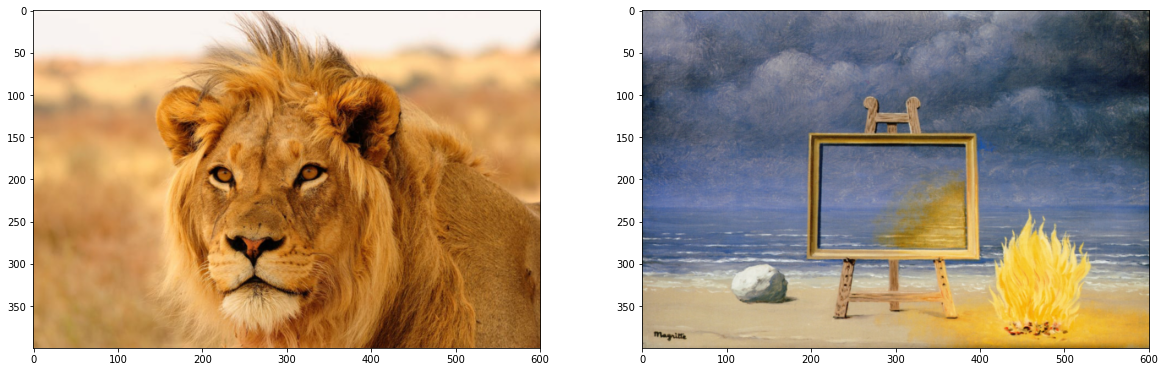

In [0]:
# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# content and style ims side-by-side
ax1.imshow(im_convert(content))
ax2.imshow(im_convert(style))

## VGG19 Layers

To get the content and style representations of an image, we have to pass an image forward throug the VGG19 network until we get to the desired layer(s) and then get the output from that layer.

In [0]:
# print out VGG19 model so you can see the names of all the layers
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Content and Style Features

Below, complete the mapping of layer names to the names found in the paper for the _content representation_ and the _style representation_.

In [0]:
def get_features(image, model, layers=None):
    """ Run an image forward through a model and get the features for 
        a set of layers. Default layers are for VGGNet matching Gatys et al (2016)
    """
    
    ## Here we gather the layers need to preserve style and content of an image
    if layers is None:
        layers = {'0': 'conv1_1',
                  '5': 'conv2_1', 
                  '10': 'conv3_1', 
                  '19': 'conv4_1',
                  '21': 'conv4_2',  ## style representation
                  '28': 'conv5_1'}
        
    features = {}
    x = image
    # model._modules is a dictionary holding each module in the model
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
            
    return features

## Gram Matrix 

The output of every convolutional layer is a Tensor with dimensions associated with the `batch_size`, a depth, `d` and some height and width (`h`, `w`). The Gram matrix of a convolutional layer can be calculated as follows:
* Get the depth, height, and width of a tensor using `batch_size, d, h, w = tensor.size`
* Reshape that tensor so that the spatial dimensions are flattened
* Calculate the gram matrix by multiplying the reshaped tensor by it's transpose 

In [0]:
def gram_matrix(tensor):
    """ Calculate the Gram Matrix of a given tensor 
        Gram Matrix: https://en.wikipedia.org/wiki/Gramian_matrix
    """
    
    # get the batch_size, depth, height, and width of the Tensor
    _, d, h, w = tensor.size()
    
    # reshape so we're multiplying the features for each channel
    tensor = tensor.view(d, h * w)
    
    # calculate the gram matrix
    gram = tensor @ tensor.t()
    
    return gram 

## We're Almost there!

Here's what our helper functions do:

* Extract the features for our content and style images from VGG19
* Compute the Gram Matrix for a given convolutional layer


What we need:
* Put it all together!

In [0]:
# get content and style features only once before training
content_features = get_features(content, vgg)
style_features = get_features(style, vgg)

# calculate the gram matrices for each layer of our style representation
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

# create a third "target" image and prep it for change
# it is a good idea to start off with the target as a copy of our *content* image
# then iteratively change its style
target = content.clone().requires_grad_(True).to(device)

## Loss and Weights

#### Individual Layer Style Weights

In the script below, we have the option to weight the style representation at each relevant layer. This will allow us to fine tune what effect size we want for each layer - earlier layers have larger style artifacts and later layers place emphasis on smaller features. Remember, each layer is a different size and by combining them we can create multi-scale style representations.

The paper suggests using a range between 0-1 to weight the layers.

#### Content and Style Weight

The paper defines a **style ratio** of $\alpha/\beta$, where  $\alpha$ is the `content_weight` and  $\beta$ is the `style_weight`. This ratio will affect how _stylized_ the final image is. It's recommended that to leave the content_weight = 1 and set the style_weight to achieve the ratio needed for a desired effect style. Note that this is not exact science, there will be lots of tuning of the ratio and the weights of the layers to get a result we're pleased with.

Remember - the reason this is called "Semi-Supervised" is because there is no right answer. We decide when to stop the training based on intermediate results we plot and stop when we are happy with what we see.

In [0]:
# weights for each style layer 
# weighting earlier layers more will result in *larger* style artifacts
# notice we are excluding `conv4_2` our content representation
style_weights = {'conv1_1': 1.,
                 'conv2_1': 0.75,
                 'conv3_1': 0.2,
                 'conv4_1': 0.2,
                 'conv5_1': 0.2}

content_weight = 1  # alpha
style_weight = 1e6  # beta

## Update the Target & Calculate Losses

Like in every training loop we've seen before, we need to decide on how many passes we want to do on our model (via gradient descent). The difference here is that we will be changing our **target** image and nothing about the VGG19 model or our original content and style images. Since this is semi-supervised, the number of steps to choose is up to you. Keep in mind that after ~50,000 steps you probably won't see any noticeable differences in the images and by using ~2,000 steps you can see early on whether the style ratio ($\alpha/\beta$) is giving the desired effect. 

Experiment with different weights or images to see some really cool effects!

#### Content Loss

The content loss will be the mean squared difference between the target and content features at layer `conv4_2`. This can be calculated as follows: (see paper)
```
content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)
```

#### Style Loss

The style loss is calculated in a similar way, but we have to iterate through the layers specified by name in our dictionary `style_weights`. 

> Calculate the gram matrix for the target image, `target_gram` and style image `style_gram` at each of these layers and compare those gram matrices, calculating the `layer_style_loss`. 

#### Total Loss

Finally, the total loss is calculated by adding up the individual style and content losses and weighting them with the specified alpha and beta values chosen.

Intermittently, we'll print out an intermediate image and its loss - don't be alarmed if the loss is very large! It takes some time for an image's style to change and you should focus on the appearance of your target image rather than any loss value, but we should still be seeing the loss go down over time.

In [0]:
# for displaying the target image, intermittently
show_every = 400

# iteration hyperparameters
optimizer = torch.optim.Adam([target], lr=0.003)
steps = 2000  # decide how many iterations to update your image

for step in range(1, steps+1):
    
    # get the features from your target image
    target_features = get_features(target, vgg)
    
    # the content loss
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)
    
    # the style loss
    # initialize the style loss to 0
    style_loss = 0
    # then add to it for each layer's gram matrix loss
    for layer in style_weights:
        # get the "target" style representation for the layer
        target_feature = target_features[layer]
        target_gram = gram_matrix(target_feature)
        _, d, h, w = target_feature.shape
        # get the "style" style representation
        style_gram = style_grams[layer]
        # the style loss for one layer, weighted appropriately
        layer_style_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
        # add to the style loss
        style_loss += layer_style_loss / (d * h * w)
        
    # calculate the *total* loss
    total_loss = content_weight * content_loss + style_weight * style_loss
    
    # update your target image
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    # display intermediate images and print the loss
    if  step % show_every == 0:
        print('Total loss: ', total_loss.item())
        plt.imshow(im_convert(target))
        plt.show()

## Display the Target Image

In [0]:
# display content and target image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(im_convert(content))
ax2.imshow(im_convert(target))

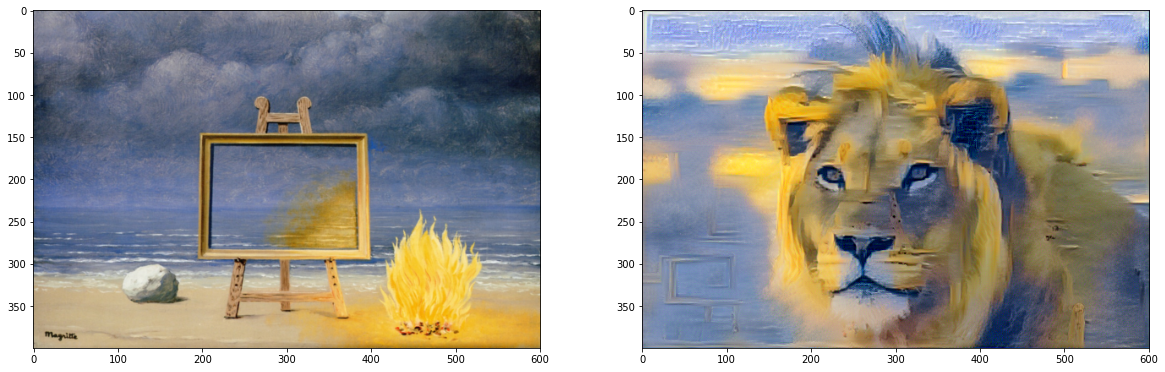

In [0]:
# display style and target image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(im_convert(style))
ax2.imshow(im_convert(target))

---
# RNN Character Level Generation

Text generation is a fun way to familiarize yourself with Recurrent Neural Nets.

In this notebook, we will deal with **character-level** text generation and why they can be just as useful as word-level text generation.

For this example, we'll be using text files to generate code similar to our input. In other words, if we put in Trump tweets, our generator should output words that sound like Trump.

### Our current understanding of RNNs
![](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/LSTM_next_character.png?raw=1)


### Reminder

![](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/rnn_unrolling.png?raw=1)

#### "RNNs have a hidden state that feeds back into the cell at the next time step"

## What is actually going on?

### Example with sequence length 5

![](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/rnn_forward.png?raw=1)

### What about the backwards pass?

![](https://github.com/robert-alvarez/pytorch_tutorial/blob/master/data/img/rnn_backward.png?raw=1)

## Preprocessing

In [0]:
# install unidecode
!pip install unidecode

     |████████████████████████████████| 245kB 11.9MB/s 


In [0]:
# Read in text and change unicode characters to ASCII
import unidecode
import string
import random
import re

all_characters = string.printable
n_characters = len(all_characters)

In [0]:
# read in file to train RNN
file = unidecode.unidecode(open('data/shakespeare.txt').read())
file_len = len(file)
print(f'file_len = {file_len}')

file_len = 99993


To give our model inputs from this large string of text, we'll split it up into chunks

In [0]:
chunk_len = 400

def random_chunk():
    start_index = random.randint(0, file_len - chunk_len)
    end_index = start_index + chunk_len + 1
    return file[start_index:end_index]

print(random_chunk())

l come in?

First Senator:
Nor after, I will, these are entertainment: the fellow of it seem'd
He should be spoke with so he shall bring off.

TROILUS:
So peasantly, for the king's tent.

DUKE VINCENTIO:
Sir, thy wife shall hurry my better; he is
may with a ruudership as a napkin to them.

OBERON:
Thou know not. Twenty loves, Sir John,
And Richard's head shall shake his head
And give a drop of jeal


## Build Model

This model will take as input the character for step $t$ and is expected to output the next character for step $t+1$. There are three layers - one linear layer that encodes the input character into an internal state, one GRU layer (which may itself have multiple layers) that operates on that internal state and a hidden state, and a decoder layer that outputs the probability distribution.

In [0]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)
        
    def forward(self, input, hidden):
        output = self.encoder(input.view(1, -1))
        output, hidden = self.gru(output.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        
        return output, hidden
    
    def init_hidden(self):
        return Variable(torch.randn(self.n_layers, 1, self.hidden_size))

## Inputs and Targets

Now that we've defined our model, we need to give it both input data, via our chunks, and our target data. Each character is one-hot encoded to the vocab size 

In [0]:
def char2tensor(string):
    tensor = torch.zeros(len(string)).long()
    for char in range(len(string)):
        if string[char] in all_characters:
            tensor[char] = all_characters.index(string[char])
        else:
            tensor[char] = 94 #predict space if character unknown
        
    return Variable(tensor)

# Let's see it in action.
print(char2tensor('Podium0123abczABC'))

tensor([51, 24, 13, 18, 30, 22,  0,  1,  2,  3, 10, 11, 12, 35, 36, 37, 38])


Now that we can generate chunks of data, we can build our inputs and targets.

Our inputs will be all of the chunk except for the last letter. 

Our target will be all of the chunk except for the first letter.

In [0]:
def random_training_set():
    chunk = random_chunk()
    inp = char2tensor(chunk[:-1])
    target = char2tensor(chunk[1:])
    return inp, target

## Evaluating the Model

To evaluate the network we will feed one character at a time, use the outputs of the network as a probability distribution for the next character, and repeat. To start generation we pass a priming string to start building up the hidden state, from which we then generate one character at a time.

In [0]:
def evaluate(model, prime_str='A', predict_len=100, temperature=0.8):
    
    hidden = model.init_hidden()
    prime_input = char2tensor(prime_str)
    predicted = prime_str
    
    # use priming string to build up hidden state
    
    for p in range(len(prime_str) - 1):
        _, hidden = model(prime_input[p], hidden)
    inp = prime_input[-1]
    
    for p in range(predict_len):
        output, hidden = model(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = char2tensor(predicted_char)
        
    return predicted

## Training

In [0]:
# helper function
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s/60)
    s -= m*60
    return '%dm %ds' % (m, s)

In [0]:
# The actual training part
def train(inp, target):
    hidden = model.init_hidden()
    model.zero_grad()
    loss = 0

    for char in range(chunk_len):
        output, hidden = model(inp[char], hidden)
        loss += criterion(output, target[char].unsqueeze(0))

    loss.backward()
    model_optimizer.step()

    return loss.data.item() / chunk_len

In [0]:
# parameters
n_epochs = 1000
print_every = 100
plot_every = 10
hidden_size = 256
n_layers = 2
learning_rate = 0.001

# model declaration
model = RNN(n_characters, hidden_size, n_characters, n_layers)
model_optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate(model, 'A ', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

In [0]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

### Load pre-trained models

In [0]:
# model declaration
hidden_size = 256
trump = RNN(n_characters, hidden_size, n_characters, n_layers=1)
trump.load_state_dict(torch.load('data/models/potus_weights.h5'))
billy = RNN(n_characters, hidden_size, n_characters, n_layers=2)
billy.load_state_dict(torch.load('data/models/shakespeare_weights.h5'))
cells = RNN(n_characters, hidden_size, n_characters, n_layers=2)
cells.load_state_dict(torch.load('data/models/cell_weights.h5'))




<All keys matched successfully>

In [0]:
# Evaluate Trump
print(evaluate(trump, '#MAGA ', predict_len=240, temperature=0.5))

#MAGA https://t.co/4KYKvZ0bt
I all of the media not been and our says and my failing is not in Democrats say and a pections of the Whis and gain to discary in the Congration!
Gover and meeting to selecting people and decause vote in the really be


In [0]:
# Evaluate Billy Shakespeare
print(evaluate(billy, 'To be or not to be: ', predict_len=200, temperature=0.5))

To be or not to be: the right ment a wild the his man
That got in the true the time me the some to the trections and here.

HOLIO:
I have men so so stain will see to me is in the passion
To men is in the will present to 


In [0]:
# Evaluate NLP model of math biology latex file
print(evaluate(cells, 'Vascular ', predict_len=200, temperature=0.4))

Vascular tumors are initial cells are in the simulation of the interogical since the system of the tumor scheme in the numerical symmatical system $\Phi_i$ & \cite{Nagy2004}. Angiogenesis seen in the tumor mas


# Resources

[tensor images](https://hackernoon.com/learning-ai-if-you-suck-at-math-p4-tensors-illustrated-with-cats-27f0002c9b32)

[alien vs predator](https://deepsense.ai/keras-vs-pytorch-avp-transfer-learning/)

[unreasonable reffectiveness of neural nets](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

[pytorch.org](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

[Richard Galvez](https://richardagalvez.github.io/)

[Visualizing and Understanding Convolutional Networks](https://arxiv.org/pdf/1311.2901.pdf)

[Image Style Transfer](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf)

[Transfer Learning Image](https://www.researchgate.net/figure/Illustration-of-transfer-learning-concept-where-the-rst-layers-in-network-A-and-network-B_fig2_316748306)

[Udacity](https://github.com/udacity/deep-learning-v2-pytorch)
